In [28]:
% matplotlib inline

In [1]:
from pylab import *
from optparse import OptionParser
import numpy as np

from netCDF4 import Dataset
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap,shiftgrid,addcyclic, cm


from netCDF4 import Dataset  as netcdf # netcdf4-python module

In [2]:
sst=Dataset("/home/pbatungwanay/Bureau/nc_data/sst.mnmean.nc")

uwnd=Dataset("/home/pbatungwanay/Bureau/nc_data/uwnd.mon.mean(1).nc",'r')

vwnd=netcdf( r'/home/pbatungwanay/Bureau/nc_data/vwnd.mon.mean(2).nc')

lons=sst['lon'][:]

lonu=uwnd['lon'][:]
lonv=vwnd['lon'][:]  #uwnd=vwnd
#print(sst)


In [3]:
# reverse temperature, u, v and latitude so they go from south to north.


latuv= vwnd['lat'][::-1]

lats=sst['lat'][::-1]

In [4]:
sst=sst['sst'][0:384,::-1,:]  #  to make it divisible by 12

u=uwnd['uwnd'][0:384,::-1,:]  #  to make it divisible by 12

v=vwnd['vwnd'][0:384,::-1,:]  #  to make it divisible by 12


sst , lons = addcyclic(sst, lons)

# shift data so lons go from -180 to 180 instead of 0 to 360.

#sst,lons = shiftgrid(180.,sst,lons,start=True)


lons, lats = np.meshgrid(lons, lats) 

/home/pbatungwanay/.local/lib/python2.7/site-packages/numpy/ma/core.py:3174: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]


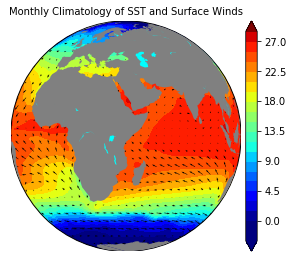

In [13]:
fig = plt.figure()
fig.patch.set_facecolor('white')

ax = fig.add_axes([0.1,0.1,0.8,0.8])

          
m = Basemap(resolution='c',projection='ortho',lat_0=0.,lon_0=40.)
            
x, y = m(lons, lats)

# set desired contour levels.
clevs = np.arange(-30,30,5)

cs2 = m.contourf(x,y,sst.mean(axis=0),20,cmap=plt.cm.jet,vmin=0, vmax=30,extend='both')

cb = m.colorbar(cs2,"right", size="5%", pad='2%') #size='5%'

plt.title('Monthly Climatology of SST and Surface Winds',fontsize=10)

# plot wind vectors on projection grid.
# first, shift grid so it goes from -180 to 180 (instead of 0 to 360
# in longitude).  Otherwise, interpolation is messed up.


ugrid,newlons = shiftgrid(180.,u,lonu,start=False)
vgrid,newlons = shiftgrid(180.,v,lonv,start=False)

ugrid=ugrid.mean(axis=0)
vgrid=vgrid.mean(axis=0)

## transform vectors to projection grid. Make sure time is one unit

uproj,vproj,xx,yy = \
m.transform_vector(ugrid,vgrid,newlons,latuv,31,31,returnxy=True,masked=True)

# now plot.

Q = m.quiver(xx,yy,uproj,vproj,scale=300,units='width')


qk = plt.quiverkey(Q, 0.5, 0.03, 5, r'$5 \frac{m}{s}$',
               labelpos='E',
               coordinates='figure',
               fontproperties={'weight': 'light'})  #light



m.fillcontinents(color='gray',lake_color='aqua')
plt.savefig('/home/pbatungwanay/Bureau/sst_wind.eps')